In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url','unknown', 'Action', 'Adventure',\
          'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror',\
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, encoding='latin-1')

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1', parse_dates=True)

In [2]:
from datetime import datetime

ratings['unix_timestamp'] = ratings['unix_timestamp'].apply(datetime.fromtimestamp)
ratings.columns = ['user_id', 'movie_id', 'rating', 'time']
ratings.head(10)

,user_id,movie_id,rating,time
0,196,242,3,1997-12-04 10:55:49
1,186,302,3,1998-04-04 14:22:22
2,22,377,1,1997-11-07 02:18:36
3,244,51,2,1997-11-27 00:02:03
4,166,346,1,1998-02-02 00:33:16
5,298,474,4,1998-01-07 09:20:06
6,115,265,2,1997-12-03 12:51:28
7,253,465,5,1998-04-03 13:34:27
8,305,451,3,1998-02-01 04:20:17
9,6,86,3,1997-12-31 16:16:53


In [3]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies.head(10)

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,1995-01-01,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),1996-01-22,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
users.head(10)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [5]:
ratings_p = pd.pivot_table(ratings, values='rating', index='user_id', columns='movie_id')
ratings_p.iloc[:10, :10]

movie_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,NaN
7,NaN,NaN,NaN,5.0,NaN,NaN,5.0,5.0,5.0,4.0
8,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN


In [6]:
mean = ratings_p.stack().mean()
std = ratings_p.stack().std()

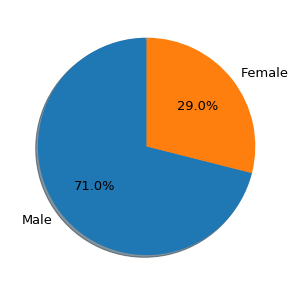

In [7]:
fig = plt.figure(figsize = (5, 5))
plt.pie(users.groupby('sex').count().iloc[:,1].sort_values(ascending=False), labels=['Male', 'Female'],\
        autopct='%1.1f%%', shadow='True', textprops={'fontsize': 13}, startangle=90)
plt.show()

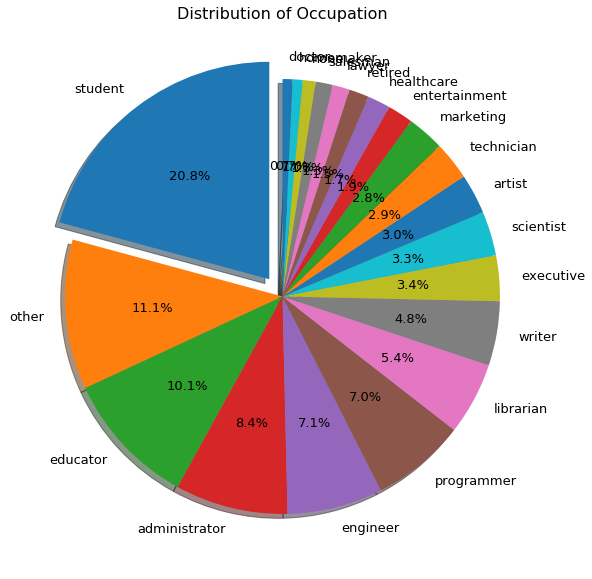

In [8]:
occ = users.groupby('occupation').count().iloc[:, 1].sort_values(ascending=False)
explode = [0 for i in range(len(occ))]
explode[0] = 0.1
fig = plt.figure(figsize = (10, 10))
label = plt.pie(occ, labels=occ.index, autopct='%1.1f%%', shadow='True', explode = explode, textprops={'fontsize': 13},\
              startangle=90)
plt.title('Distribution of Occupation', fontsize=16)
plt.show()

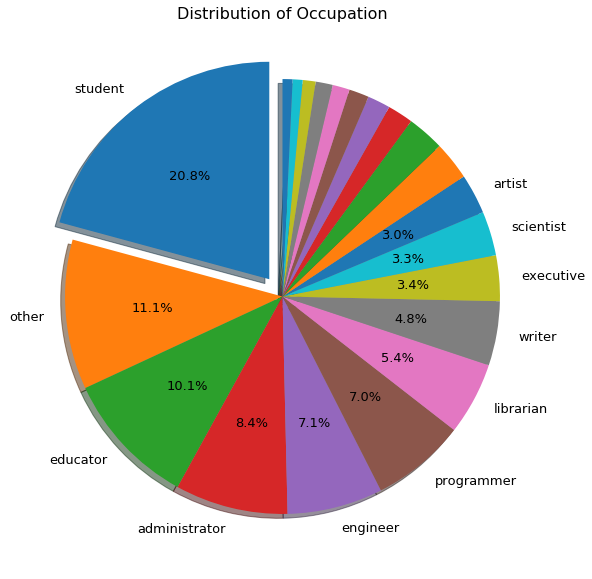

In [9]:
occ = users.groupby('occupation').count().iloc[:, 1].sort_values(ascending=False)
explode = [0 for i in range(len(occ))]
explode[0] = 0.1
fig = plt.figure(figsize = (10, 10))
pie = plt.pie(occ, shadow='True', explode = explode, textprops={'fontsize': 13},\
              startangle=90)
#plt.text(-0.729059,0.953138,'student', horizontalalignment='right', verticalalignment='center', fontsize=13)
#plt.text(-0.425285,0.555997,'20.8%', horizontalalignment='center', verticalalignment='center', fontsize=13)
for i in range(len(label[1])):
    if i <= 3:
        plt.text(label[1][i]._x, label[1][i]._y, label[1][i]._text, horizontalalignment='right', verticalalignment='center', fontsize=13)
        plt.text(label[2][i]._x, label[2][i]._y, label[2][i]._text, horizontalalignment='center', verticalalignment='center', fontsize=13)
    if 3 < i <= 10:
        plt.text(label[1][i]._x, label[1][i]._y, label[1][i]._text, horizontalalignment='left', verticalalignment='center', fontsize=13)
        plt.text(label[2][i]._x, label[2][i]._y, label[2][i]._text, horizontalalignment='center', verticalalignment='center', fontsize=13)
plt.title('Distribution of Occupation', fontsize=16)
plt.show()

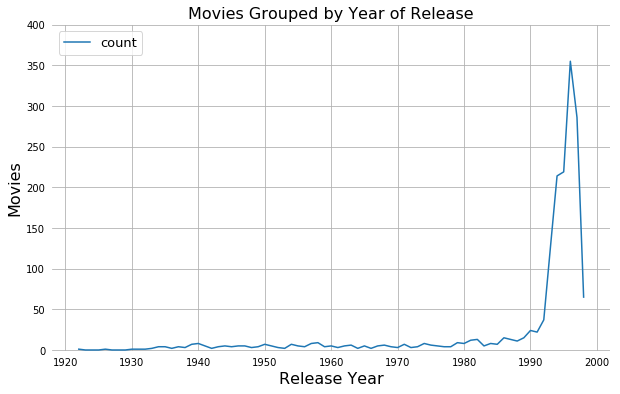

In [10]:
release_date = pd.DataFrame(np.zeros(77), index=np.arange(1922,1999), columns=['count'])
release_date['count'] = movies['release_date'].groupby(movies['release_date'].dt.year).count()
release_date.fillna(0, inplace=True)
fig = plt.figure(figsize = (10, 6))
ax = plt.subplot(111)
plt.plot(release_date, label='count')
plt.xlim(1918, 2002)
plt.ylim(-1, 400)
ax.set_axisbelow(True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(bottom=False, left=False)
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Movies', fontsize=16)
plt.title('Movies Grouped by Year of Release', fontsize=16)
plt.grid()
plt.legend(loc=2, fontsize=13)
plt.show()

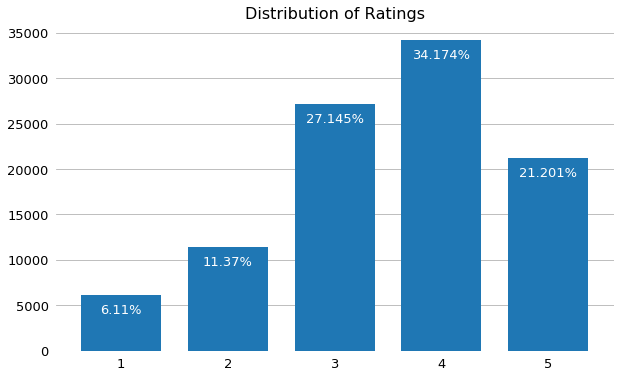

In [11]:
fig = plt.figure(figsize = (10, 6))
ax = plt.subplot(111)
bars = plt.bar(np.arange(5), ratings.groupby('rating').count().iloc[:,1], width=0.75)
ax.set_axisbelow(True)
plt.xticks(np.arange(5), [1,2,3,4,5], fontsize=13)
plt.yticks(fontsize=13)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(bottom=False, left=False)
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2000, str(int(bar.get_height())/1000) + '%', 
                 ha='center', color='w', fontsize=13)
plt.title('Distribution of Ratings', fontsize=16)
plt.grid(axis='y')
plt.show()

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


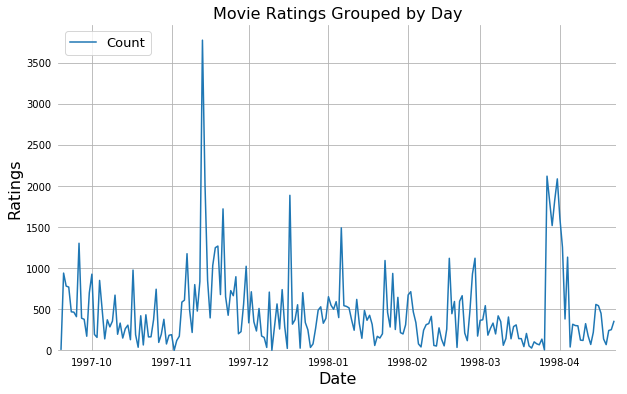

In [12]:
ratings_date = pd.DataFrame(ratings.groupby([ratings['time'].dt.year, ratings['time'].dt.month, ratings['time'].dt.day])\
                            .count().loc[:,'time'])
ratings_date.index.names = ['year', 'month', 'day']
ratings_date.reset_index(inplace=True)
ratings_date['Time'] = pd.to_datetime(dict(year=ratings_date.year, month=ratings_date.month, day=ratings_date.day))
ratings_date.drop(['year', 'month', 'day'], axis=1, inplace=True)
ratings_date.columns = ['Count', 'Time']
fig = plt.figure(figsize = (10, 6))
plt.plot(ratings_date['Time'], ratings_date['Count'], label='Count')
ax.set_axisbelow(True)
plt.xlim(ratings_date['Time'].iloc[0] - pd.DateOffset(1), ratings_date['Time'].iloc[-1] + pd.DateOffset(1))
plt.ylim(-4)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(bottom=False, left=False)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Ratings', fontsize=16)
plt.title('Movie Ratings Grouped by Day', fontsize=16)
plt.grid()
plt.legend(loc=2, fontsize=13)
plt.show()

In [13]:
ratings_movie_summary = ratings.groupby('movie_id')['rating'].agg(['count', 'mean', 'std'])
ratings_movie_summary.head(10)

,count,mean,std
movie_id,,,
1,452,3.878319,0.927897
2,131,3.206107,0.966497
3,90,3.033333,1.212760
4,209,3.550239,0.965069
5,86,3.302326,0.946446
6,26,3.576923,1.301478
7,392,3.798469,0.982037
8,219,3.995434,1.002281
9,299,3.896321,1.042368


In [14]:
ratings_user_summary = ratings.groupby('user_id')['rating'].agg(['count', 'mean', 'std'])
ratings_user_summary.head(10)

,count,mean,std
user_id,,,
1,272,3.610294,1.263585
2,62,3.709677,1.030472
3,54,2.796296,1.219026
4,24,4.333333,0.916831
5,175,2.874286,1.362963
6,211,3.635071,1.039461
7,403,3.965261,1.064480
8,59,3.796610,1.242629
9,22,4.272727,0.935125


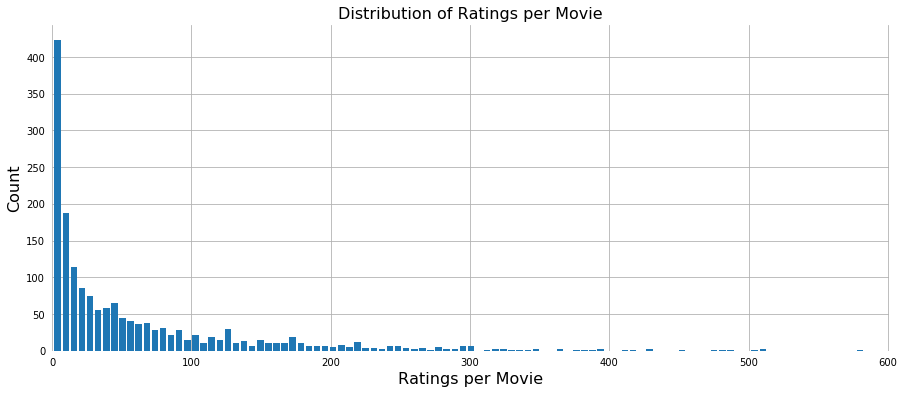

In [15]:
movie_count = ratings_movie_summary.sort_values(by='count', ascending=False)['count']#.hist(bins=100, figsize=(10,6))
fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(111)
plt.hist(movie_count, bins=100, rwidth=0.8)
ax.set_axisbelow(True)
ax.set_xlim(0, 601)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(bottom=False, left=False)
plt.xlabel('Ratings per Movie', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Ratings per Movie', fontsize=16)
plt.grid()
plt.show()

Weighted Rating

Notations:

$v_i$ : number of ratings received by movie i.

$m$ : minimum number of ratings that the movie need, in order to be taken into account.

$$\text{Weighted_Rating} = \frac{v_i}{v_i+m} * \mu_i + \frac{m}{v_i+m} * \mu$$

Here is an example when $m = 10$.

In [16]:
weighted_ratings = ratings_movie_summary.copy()
weighted_ratings['Weighted_Rating'] = weighted_ratings['count']/(weighted_ratings['count'] + 10) * weighted_ratings['mean']\
                            + 10 / (weighted_ratings['count'] + 10) * mean
weighted_ratings.sort_values(by='Weighted_Rating', ascending=False, inplace=True)
weighted_ratings = pd.merge(weighted_ratings, movies, on='movie_id')
weighted_ratings.iloc[:10,4:6]

,Weighted_Rating,title
0,4.436034,Schindler's List (1993)
1,4.420153,Casablanca (1942)
2,4.413988,"Shawshank Redemption, The (1994)"
3,4.412284,"Close Shave, A (1995)"
4,4.392958,"Wrong Trousers, The (1993)"
5,4.354869,"Usual Suspects, The (1995)"
6,4.348395,Rear Window (1954)
7,4.344517,Star Wars (1977)
8,4.328553,Wallace & Gromit: The Best of Aardman Animatio...
9,4.283693,12 Angry Men (1957)


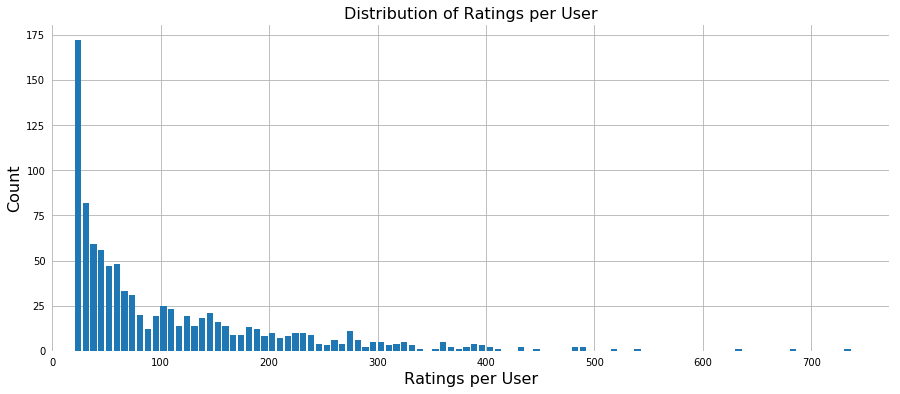

In [17]:
user_count = ratings_user_summary.sort_values(by='count', ascending=False)['count']
fig = plt.figure(figsize = (15, 6))
ax = plt.subplot(111)
plt.hist(user_count, bins=100, rwidth=0.8)
ax.set_axisbelow(True)
ax.set_xlim(0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(bottom=False, left=False)
plt.xlabel('Ratings per User', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Ratings per User', fontsize=16)
plt.grid()
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

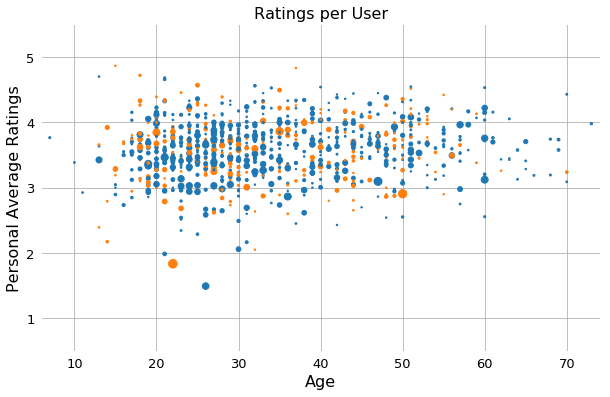

In [18]:
age = users[['user_id', 'age', 'sex']]
age.set_index('user_id', inplace=True)
age['sex'] = age['sex'].replace(['F', 'M'], ['C1', 'C0'])
age['mean'] = ratings_user_summary['mean']
age['count'] = ratings_user_summary['count']
fig = plt.figure(figsize = (10, 6))
ax = plt.subplot(111)
plt.scatter(age['age'], age['mean'], s=age['count']/10, c=age['sex'])
ax.set_axisbelow(True)
ax.set_xlim(6, 74)
ax.set_ylim(0.5, 5.5)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(bottom=False, left=False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Personal Average Ratings', fontsize=16)
plt.title('Ratings per User', fontsize=16)
plt.grid()
plt.show()

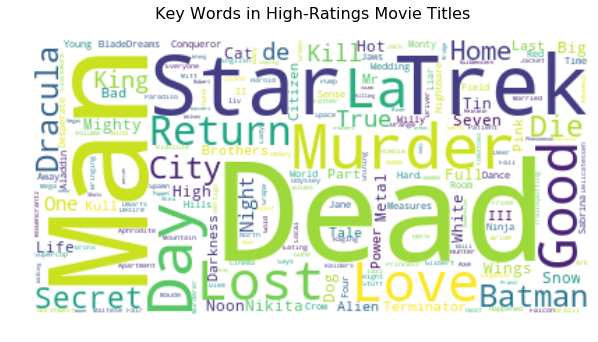

In [19]:
from wordcloud import WordCloud

mr = ratings_movie_summary[['count', 'mean']]
mr['title'] = movies['title']
mr.sort_values(by='mean', ascending=False, inplace=True)
mr = mr[mr['count']>=100]
txt=''
for i in mr['title']:
    txt+=str(i)
wordcloud = WordCloud(background_color='white').generate(txt)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Key Words in High-Ratings Movie Titles', fontsize=16, y=1.05)
plt.show()

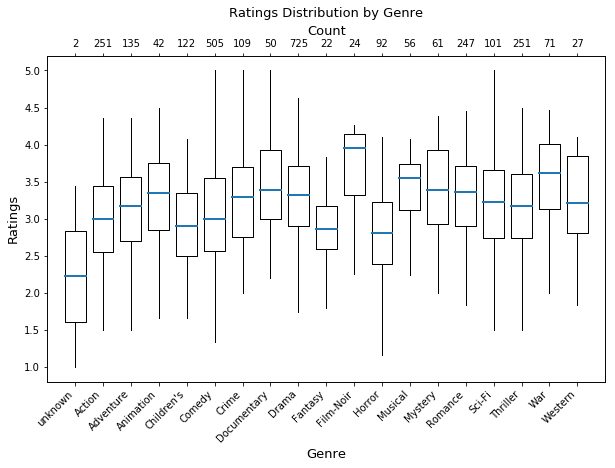

In [20]:
box = movies.drop(['title', 'release_date', 'video_release_date', 'imdb_url'], axis=1)
box.set_index('movie_id', inplace=True)
box['rating'] = ratings_movie_summary['mean']
df = movies.copy()
for i in box.columns[:-1]:
    df[i] = box[box[i]==1]['rating']
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
for i in range(len(box.columns) - 1):
    plt.boxplot(box[box[box.columns[i]]==1]['rating'], positions=[(i+1)*4/20], showcaps=False, showfliers=False,\
                medianprops={'linewidth':2, 'color':'C0'})
ax.set_xlim(0, 4)
ax.set_xticks(np.arange(0, 4, 4/20)[1:])
ax.set_xticklabels(box.columns[:-1], rotation = 45, ha="right")
plt.title('Ratings Distribution by Genre', fontsize=13, y=1.1)
plt.ylabel('Ratings', fontsize=13)
plt.xlabel('Genre', fontsize=13)
ax2 = ax.twiny()
ax2.set_xlim(0, 4)
ax2.set_xticks(np.arange(0, 4, 4/20)[1:])
ax2.set_xticklabels(box.sum().astype(int)[:-1])
ax2.set_xlabel('Count', fontsize=13)
plt.show()

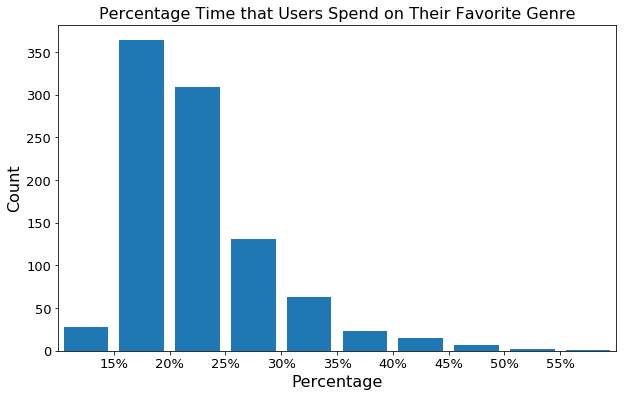

In [21]:
personal = ratings.merge(movies, on='movie_id')
personal.drop(['movie_id', 'rating', 'time', 'title', 'release_date', 'video_release_date', 'imdb_url'],\
              axis=1, inplace=True)
personal = personal.groupby('user_id').sum()
total = pd.DataFrame(personal.max(axis=1) / personal.sum(axis=1))
total['group'] = pd.cut(total[0], bins=np.arange(0.1, 0.65, 0.05), right=False)
total = total.groupby('group').count().sort_index()
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
plt.bar(np.arange(total.shape[0]), total[0])
ax.set_xlim(-0.5, 9.5)
plt.xticks(np.arange(0.5, 9.5, 1), ['15%', '20%', '25%', '30%', '35%', '40%', '45%', '50%', '55%'], fontsize=13)
plt.yticks(fontsize=13)
plt.title('Percentage Time that Users Spend on Their Favorite Genre', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Percentage', fontsize=16)
plt.show()

- **Problems Found**

In [22]:
movies[movies['release_date'].isna()]

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaT,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
ratings[ratings['movie_id']==267]

,user_id,movie_id,rating,time
2172,130,267,5,1997-10-02 10:07:19
3781,5,267,4,1997-09-30 11:57:44
7245,268,267,3,1997-10-01 17:41:17
12475,297,267,3,1997-09-27 21:12:19
14756,319,267,4,1997-10-01 08:08:10
15292,1,267,4,1997-10-01 04:02:35
49295,532,267,3,1997-09-28 06:09:08
93523,833,267,1,1997-09-30 17:41:09
99723,422,267,4,1997-09-30 17:46:26


In [24]:
users['zip_code'].sort_values()[-20:]

517    99709
676    99835
200    E2A4H
922    E2E3R
778    K7L5J
900    L1V3W
166    L9G2B
593    M4J2K
577    M7A1A
915    N2L5N
708    N4T1A
598    R3T5K
633    T8H1N
73     T8H1N
718    V0R2H
332    V0R2M
856    V1G4L
144    V3N4P
489    V5A2B
457    Y1A6B
Name: zip_code, dtype: object